In [4]:
import pandas as pd

In [6]:
# Load the CSV file to analyze the data
file_path = 'export-blocks-1714695417694.csv'
block_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and the column names to understand the structure of the data
block_data.head(), block_data.columns

(      Block       DateTime (UTC)  Txn  \
 0  19785952  2024-05-03 00:16:35  159   
 1  19785951  2024-05-03 00:16:23   82   
 2  19785950  2024-05-03 00:16:11  129   
 3  19785949  2024-05-03 00:15:59  208   
 4  19785948  2024-05-03 00:15:47   95   
 
                                 Fee Recipient       Fee Recipient Nametag  \
 0  0x1f9090aae28b8a3dceadf281b0f12828e676c326           rsync-builder.eth   
 1  0x95222290dd7278aa3ddd389cc1e1d165cc4bafe5                 beaverbuild   
 2  0x95222290dd7278aa3ddd389cc1e1d165cc4bafe5                 beaverbuild   
 3  0xe94f1fa4f27d9d288ffea234bb62e1fbc086ca0c  Fee Recipient: 0xE94...A0c   
 4  0x95222290dd7278aa3ddd389cc1e1d165cc4bafe5                 beaverbuild   
 
      Gas Used Gas Used(%)  % Of Gas Target   Gas Limit   Base Fee  \
 0  13,402,649      44.68%             -11%  30,000,000  5.26 Gwei   
 1   5,426,441      18.09%             -64%  30,000,000  5.72 Gwei   
 2  10,034,681      33.45%             -33%  30,000,000  5.97 Gwei

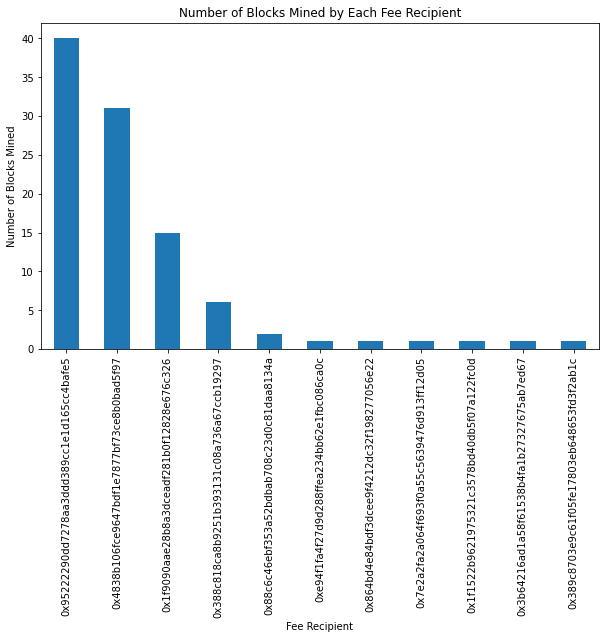

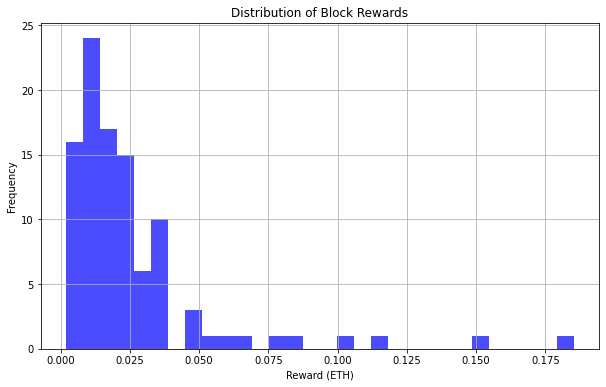

(              Block         Txn      Gas Used    Base Fee      Reward  \
 count  1.000000e+02  100.000000  1.000000e+02  100.000000  100.000000   
 mean   1.978590e+07  153.090000  1.524331e+07    4.727100    0.025804   
 std    2.901149e+01   61.405441  7.508901e+06    0.437503    0.028801   
 min    1.978585e+07   26.000000  1.133002e+06    3.740000    0.002040   
 25%    1.978588e+07  108.000000  9.736885e+06    4.465000    0.010600   
 50%    1.978590e+07  139.500000  1.330276e+07    4.680000    0.017145   
 75%    1.978593e+07  186.750000  2.103837e+07    4.925000    0.030935   
 max    1.978595e+07  338.000000  2.999759e+07    6.280000    0.185190   
 
        Burnt Fees (ETH)  
 count        100.000000  
 mean           0.071059  
 std            0.032933  
 min            0.005500  
 25%            0.045309  
 50%            0.065132  
 75%            0.096009  
 max            0.135742  ,
 0x95222290dd7278aa3ddd389cc1e1d165cc4bafe5    40
 0x4838b106fce9647bdf1e7877bf73ce8b0ba

In [7]:
# Clean and convert data for analysis
block_data['Gas Used'] = block_data['Gas Used'].str.replace(',', '').astype(int)
block_data['Base Fee'] = block_data['Base Fee'].str.replace(' Gwei', '').astype(float)
block_data['Reward'] = block_data['Reward'].str.replace(' ETH', '').astype(float)
block_data['Burnt Fees (ETH)'] = block_data['Burnt Fees (ETH)'].astype(float)

# Basic summary statistics
summary_stats = block_data.describe()

# Frequency of blocks mined by each fee recipient to assess decentralization
miner_count = block_data['Fee Recipient'].value_counts()

# Visualization of data for decentralization and rewards
import matplotlib.pyplot as plt

# Plot for assessing decentralization
plt.figure(figsize=(10, 6))
miner_count.plot(kind='bar')
plt.title('Number of Blocks Mined by Each Fee Recipient')
plt.xlabel('Fee Recipient')
plt.ylabel('Number of Blocks Mined')
plt.show()

# Plot for Reward Distribution
plt.figure(figsize=(10, 6))
block_data['Reward'].hist(bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Block Rewards')
plt.xlabel('Reward (ETH)')
plt.ylabel('Frequency')
plt.show()

summary_stats, miner_count.head()